
Simple Regression Results:
Area Coefficient: 435.17
Baseline Price (Intercept): 2510330.09

Multiple Regression Coefficients:
area: 338.93
bedrooms: 170501.10
bathrooms: 1164956.61
stories: 539039.77
parking: 398300.25
Baseline Price: -199791.07

Simple Model Performance:
MAE: 1200776.61
MSE: 2827054317342.21

Multiple Model Performance:
MAE: 884255.98
MSE: 1294555442803.30


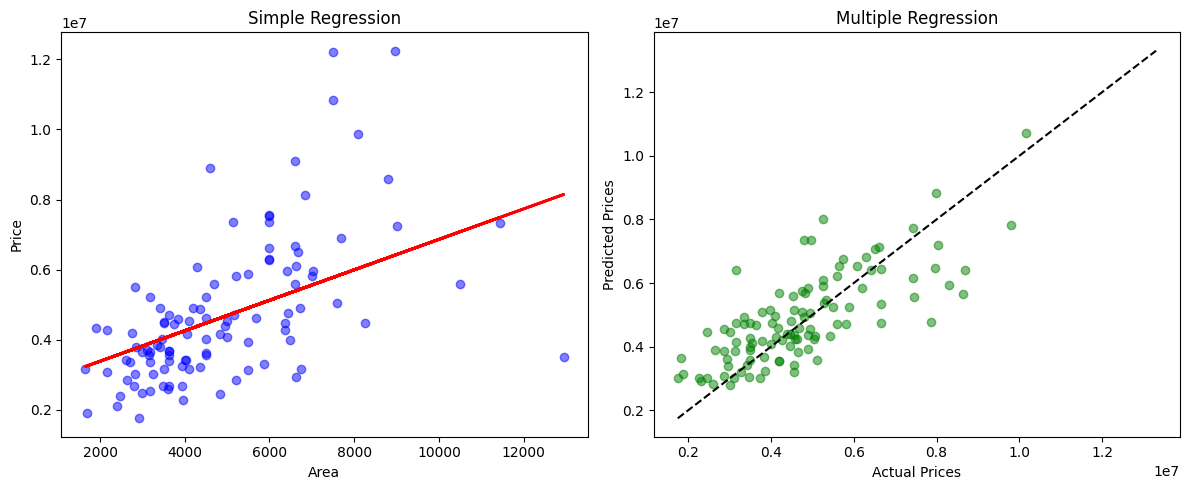

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

try:
    df = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("Error: housing.csv file not found in current directory")
    print("Download it from Kaggle and place in your working folder")
    exit()

x_simple = df[['area']]
x_multi = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_simple, y, test_size=0.2)
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_multi, y, test_size=0.2)

simple_model = LinearRegression()
simple_model.fit(x_train_s, y_train_s)

multi_model = LinearRegression()
multi_model.fit(x_train_m, y_train_m)

pred_s = simple_model.predict(x_test_s)
pred_m = multi_model.predict(x_test_m)

print("\nSimple Regression Results:")
print(f"Area Coefficient: {simple_model.coef_[0]:.2f}")
print(f"Baseline Price (Intercept): {simple_model.intercept_:.2f}")

print("\nMultiple Regression Coefficients:")
for name, value in zip(x_multi.columns, multi_model.coef_):
    print(f"{name}: {value:.2f}")
print(f"Baseline Price: {multi_model.intercept_:.2f}")

print("\nSimple Model Performance:")
print(f"MAE: {mean_absolute_error(y_test_s, pred_s):.2f}")
print(f"MSE: {mean_squared_error(y_test_s, pred_s):.2f}")

print("\nMultiple Model Performance:")
print(f"MAE: {mean_absolute_error(y_test_m, pred_m):.2f}")
print(f"MSE: {mean_squared_error(y_test_m, pred_m):.2f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(x_test_s, y_test_s, color='blue', alpha=0.5)
plt.plot(x_test_s, pred_s, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Regression')

plt.subplot(1,2,2)
plt.scatter(y_test_m, pred_m, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Regression')

plt.tight_layout()
plt.show()


